In [1]:
import os
import re
import uproot
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib.colors import LogNorm

### Merging

In [2]:
fname  = os.path.expandvars("$LUSTRE/CProfiles/e-/tuning/cprofiles_merged.root")
f  = uproot.open(fname)
print(f.classnames())

# get momentum values
momenta = np.sort([float(re.findall(r'\d+(?:\.\d+)?', key)[0]) for key in f.keys() if re.match("g_\d+", key)])

{'g_225.0;1': 'TH2D', 'g_100.0;1': 'TH2D', 'g_125.0;1': 'TH2D', 'g_175.0;1': 'TH2D', 'g_200.0;1': 'TH2D', 'g_150.0;1': 'TH2D', 'g_250.0;1': 'TH2D', 'g_300.0;1': 'TH2D', 'g_275.0;1': 'TH2D', 'g_325.0;1': 'TH2D', 'g_350.0;1': 'TH2D', 'g_375.0;1': 'TH2D', 'g_425.0;1': 'TH2D', 'g_400.0;1': 'TH2D', 'g_600.0;1': 'TH2D', 'g_525.0;1': 'TH2D', 'g_450.0;1': 'TH2D', 'g_475.0;1': 'TH2D', 'g_550.0;1': 'TH2D', 'g_575.0;1': 'TH2D', 'g_500.0;1': 'TH2D', 'g_nevents;1': 'TGraph'}


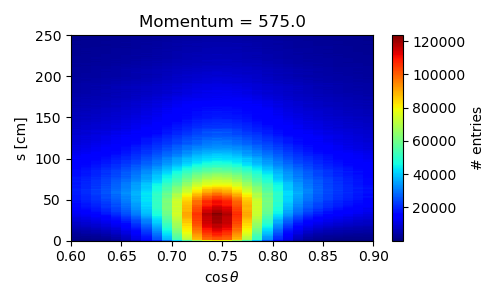

In [16]:
# choose random momentum
# p = 240
# i = np.digitize(p, momenta)
# momentum = momenta[i]
momentum = np.random.choice(momenta)
H, thbins, sbins  =  f[f"g_{momentum}"].to_numpy()

plt.figure(figsize=[5, 3])

plt.title(f"Momentum = {momentum}")
plt.pcolormesh(thbins, sbins, H.T, cmap="jet")
plt.xlim([0.6, 0.9])
plt.ylim([None, 250])
plt.xlabel(r"$\cos \theta$")
plt.ylabel("s [cm]")
plt.colorbar(label="# entries")

plt.tight_layout()

In [23]:
import uproot
fin = uproot.open("/sps/t2k/gdiazlop/CProfiles/e-/out/out_e-_250_586.root")
h, thbins, sbins = fin[f"wtg"].to_numpy()

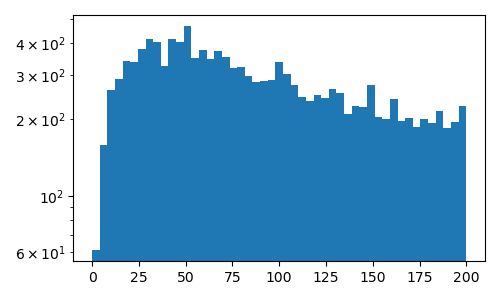

In [31]:
plt.figure(figsize=[5, 3])
plt.hist(H[H>0].flatten(), bins=np.linspace(0, 200))
plt.yscale("log")
plt.tight_layout()

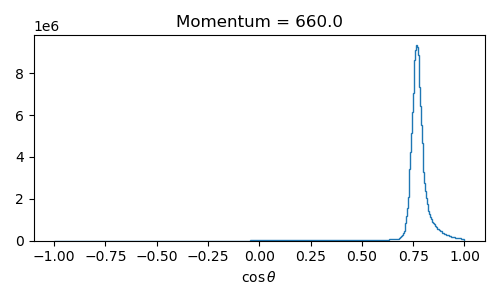

In [19]:
momentum = np.random.choice(momenta)
H, thbins, sbins  =  f[f"g_{momentum}"].to_numpy()

plt.figure(figsize=[5, 3])

plt.title(f"Momentum = {momentum}")
plt.stairs(H.T.sum(axis=0), thbins)
# plt.xlim([0.4, None])
plt.xlabel(r"$\cos \theta$")

plt.tight_layout()